In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import accuracy_score, precision_score

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Public Variables

In [2]:
num_class = 3
classes = ("functional", "functional needs repair","non-functional")
n_estimators = [100, 200]
max_depths = [28, 30, 31, 32]

In [3]:
train_results = []
test_results = []

In [4]:
train_df = pd.read_csv("./datasets/merged_train.csv")
test_df = pd.read_csv("./datasets/test.csv")
submission_df = pd.read_csv("./datasets/SubmissionFormat.csv")

In [5]:
input_df = train_df.drop("status_group", axis=1)
output_df = train_df["status_group"]

In [6]:
print(input_df.shape)
print(output_df.shape)

(59400, 28)
(59400,)


### Split Dataset

In [7]:
input_train, input_test, output_train, output_test = tts(input_df, output_df, test_size=0.3)

## Train the Model

In [8]:
d_tree = None
for estimator in n_estimators:    
    d_tree = RandomForestClassifier(n_estimators=estimator, n_jobs=1, max_depth=30)
    d_tree.fit(input_train, output_train)
    repredict_output = d_tree.predict(input_train)
    predicted_output = d_tree.predict(input_test)    
    train_results.append((estimator, 
    accuracy_score(output_train, repredict_output), 
    accuracy_score(output_test, predicted_output), 
    precision_score(output_train, repredict_output, average=None),
    precision_score(output_test, predicted_output, average=None)))

In [9]:
conf_matrix = confusion_matrix(output_test, predicted_output)

In [10]:
print(pd.DataFrame(conf_matrix))

0    1     2
0  8650  243   840
1   680  392   205
2  1431  117  5262


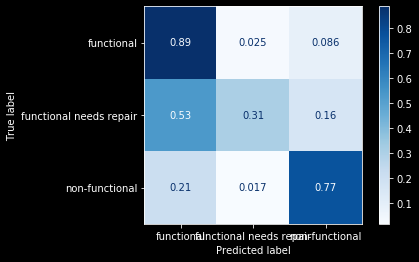

In [11]:
plot_conf_matrix = plot_confusion_matrix(d_tree, input_test, output_test, display_labels=classes, cmap=plt.cm.Blues, normalize='true')

In [12]:
classification_report = classification_report(output_test, predicted_output, output_dict=True)

In [13]:
class_report_df = pd.DataFrame(classification_report).transpose()

In [14]:
class_report_df

,precision,recall,f1-score,support
functional,0.803829,0.888729,0.844150,9733.000000
functional needs repair,0.521277,0.306969,0.386397,1277.000000
non functional,0.834311,0.772687,0.802318,6810.000000
accuracy,0.802694,0.802694,0.802694,0.802694
macro avg,0.719805,0.656129,0.677621,17820.000000
weighted avg,0.795230,0.802694,0.795360,17820.000000


In [15]:
test_predicitons = d_tree.predict(test_df)

In [16]:
test_predicitons

array(['functional', 'functional', 'functional', ..., 'non functional',
       'non functional', 'non functional'], dtype=object)

In [17]:
for (idx,data) in submission_df["status_group"].iteritems():
    submission_df["status_group"][idx] = test_predicitons[idx]

In [18]:
submission_df.to_csv("./datasets/submission.csv", index=False, header=True)